In [4]:
from qiskit.circuit.quantumregister import QuantumRegister
from qiskit.dagcircuit.dagcircuit import DAGCircuit
from qiskit.converters import circuit_to_dag, dag_to_circuit
from qiskit.tools.visualization import dag_drawer
import supremacy_generator as suprem_gen
from qiskit.visualization import plot_state_city
import numpy as np
import functools
import timeit
from datetime import timedelta
import supremacy_generator as suprem_gen
import matplotlib.pyplot as plt
from matplotlib import cm
import auto_cut_help_fun as cut_finder
import circuit_cut as cutter
import cutting_help_fun as cutting_helper
import sys
import networkx as nx

dimensions = range(2,8)
pareto_times = np.zeros((len(dimensions), len(dimensions)))
bug_circ = None
bug_cuts = None

for i in dimensions:
    for j in dimensions:
        if i*j < 20:
            circ = suprem_gen.circuit_generator(circuit_dimension=[i,j,8])
            start = timeit.default_timer()
            pareto_K_d = cut_finder.find_pareto_solutions(circ)
            for x in pareto_K_d:
                try:
                    cutter.cut_circuit(circ, pareto_K_d[x])
                except:
                    bug_circ = circ
                    bug_cuts = pareto_K_d[x]
                    sys.exit(0)
            end = timeit.default_timer()
            pareto_times[i-2,j-2] = end-start
        else:
            pareto_times[i-2,j-2] = 0

plt.figure(figsize=(10,10))
plt.imshow(pareto_times, aspect='auto',
           extent=[min(dimensions), max(dimensions), min(dimensions), max(dimensions)], cmap = cm.viridis)
plt.xlabel('#horizontal qubits')
plt.ylabel('#vertical qubits')
plt.title('pareto solution time')
plt.colorbar()
plt.show()

# for x in pareto_K_d:
#     pareto_K, pareto_d = x
#     sub_circs_no_bridge, complete_path_map, K, d = cutter.cut_circuit(circ, pareto_K_d[x])
#     print((pareto_K, pareto_d), (K, d))

will run 8 times
will run 40 times
will run 103 times
will run 200 times
will run 332 times
will run 503 times
will run 40 times
will run 164 times
will run 385 times
will run 714 times
will run 1156 times
will run 103 times
will run 385 times
will run 877 times
will run 200 times
will run 714 times
will run 332 times
will run 1156 times


SystemExit: 0

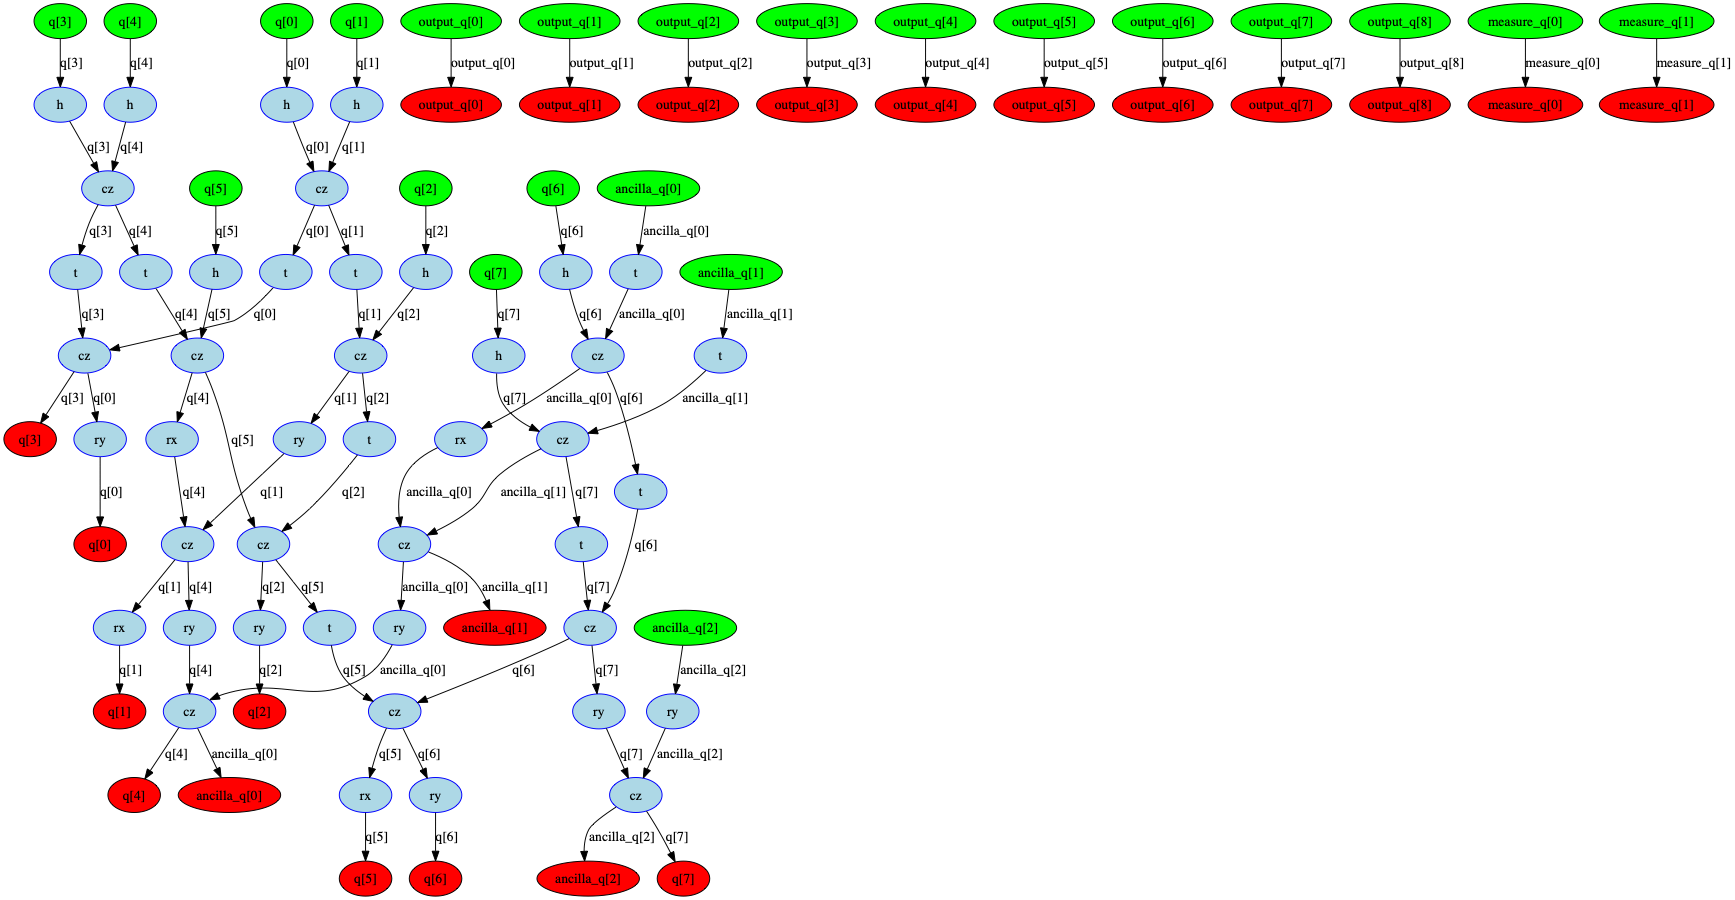

In [21]:
original_dag = circuit_to_dag(bug_circ)
cut_dag, path_order_dict = cutting_helper.cut_edges(original_dag=original_dag, positions=bug_cuts)
components = list(nx.weakly_connected_components(cut_dag._multi_graph))
# for node in components[0]:
#     print(node.type, node.name)
dag_drawer(cut_dag)
sub_circs_no_bridge = cutting_helper.generate_sub_circs(cut_dag, bug_cuts)
dag_drawer(circuit_to_dag(sub_circs_no_bridge[0]))

In [11]:
in_out_arg_dict = cutting_helper.contains_wire_nodes(cut_dag)
[print(x,in_out_arg_dict[x]) for x in in_out_arg_dict]
sub_reg_dicts, input_wires_mapping = cutting_helper.sub_circ_reg_counter(cut_dag, in_out_arg_dict)
print(sub_reg_dicts)
components = list(nx.weakly_connected_components(cut_dag._multi_graph))
translation_dict = cutting_helper.translation_dict_calc(input_wires_mapping, components, in_out_arg_dict, sub_reg_dicts)
complete_path_map = cutting_helper.complete_path_calc(path_order_dict, input_wires_mapping, translation_dict, sub_reg_dicts)
K, d = cutting_helper.cluster_character(sub_reg_dicts, bug_cuts)

((QuantumRegister(18, 'q'), 0), 0) (True, True, True)
((QuantumRegister(18, 'q'), 0), 1) (False, False, False)
((QuantumRegister(18, 'q'), 1), 0) (True, True, True)
((QuantumRegister(18, 'q'), 1), 1) (False, False, False)
((QuantumRegister(18, 'q'), 2), 0) (True, True, True)
((QuantumRegister(18, 'q'), 2), 1) (False, False, False)
((QuantumRegister(18, 'q'), 3), 0) (True, False, True)
((QuantumRegister(18, 'q'), 3), 1) (False, True, True)
((QuantumRegister(18, 'q'), 4), 0) (True, True, True)
((QuantumRegister(18, 'q'), 4), 1) (False, False, False)
((QuantumRegister(18, 'q'), 5), 0) (True, True, True)
((QuantumRegister(18, 'q'), 5), 1) (False, False, False)
((QuantumRegister(18, 'q'), 6), 0) (False, False, False)
((QuantumRegister(18, 'q'), 6), 1) (True, True, True)
((QuantumRegister(18, 'q'), 7), 0) (False, True, True)
((QuantumRegister(18, 'q'), 7), 1) (True, False, True)
((QuantumRegister(18, 'q'), 8), 0) (True, True, True)
((QuantumRegister(18, 'q'), 8), 1) (False, False, False)
((Q

QiskitIndexError: 'register index out of range'